In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/texidataset/data.csv


In [28]:
df = pd.read_csv('/kaggle/input/texidataset/data.csv')

In [29]:
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  pickup_census_tract     1 non-null      float64
 12  dropoff_census_tract    10761 non-null  float64
 13  payment_type            15002 non-null  object 
 14  company                 9862 non-null 

In [31]:
df['pickup_census_tract'].value_counts()

pickup_census_tract
1.703108e+10    1
Name: count, dtype: int64

In [32]:
df['company'].value_counts()

company
Taxi Affiliation Services            5176
Dispatch Taxi Affiliation            1636
Blue Ribbon Taxi Association Inc.    1090
Choice Taxi Association               872
Northwest Management LLC              551
                                     ... 
3897 - Ilie Malec                       1
5864 - Thomas Owusu                     1
585 - Valley Cab Co                     1
5074 - Ahzmi Inc                        1
5997 - AW Services Inc.                 1
Name: count, Length: 61, dtype: int64

In [33]:
pd.DataFrame(df['company'].value_counts()[:10])

,count
company,
Taxi Affiliation Services,5176
Dispatch Taxi Affiliation,1636
Blue Ribbon Taxi Association Inc.,1090
Choice Taxi Association,872
Northwest Management LLC,551
KOAM Taxi Association,246
Top Cab Affiliation,132
Chicago Elite Cab Corp. (Chicago Carriag,26
Chicago Medallion Leasing INC,22


In [34]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

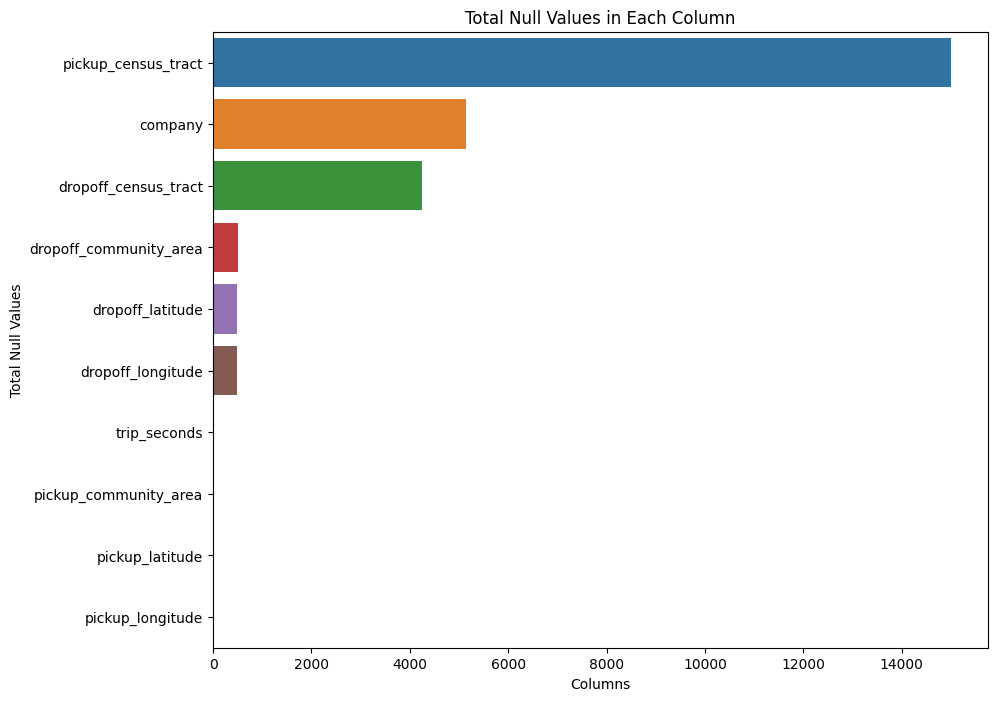

In [35]:

#  total null values
null_values = df.isnull().sum()
null_values = null_values[null_values>0].sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(y=null_values.index,x=null_values.values,orient='h')
plt.title('Total Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Total Null Values')
plt.xticks()
plt.show()

In [36]:
df.drop(columns=["pickup_census_tract","company","dropoff_census_tract"],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15000 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15000 non-null  float64
 7   pickup_longitude        15000 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  payment_type            15002 non-null  object 
 12  trip_seconds            14996 non-null  float64
 13  dropoff_community_area  14495 non-null  float64
 14  tips                    15002 non-null

In [38]:
# checking how many null values will left if i drop some based on dropoff_latituded
df[df['dropoff_latitude'].isna() == False].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14519 entries, 28 to 15000
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   14519 non-null  float64
 1   fare                    14519 non-null  float64
 2   trip_start_month        14519 non-null  int64  
 3   trip_start_hour         14519 non-null  int64  
 4   trip_start_day          14519 non-null  int64  
 5   trip_start_timestamp    14519 non-null  int64  
 6   pickup_latitude         14519 non-null  float64
 7   pickup_longitude        14519 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              14519 non-null  float64
 11  payment_type            14519 non-null  object 
 12  trip_seconds            14518 non-null  float64
 13  dropoff_community_area  14495 non-null  float64
 14  tips                    14519 non-null  fl

In [39]:
df = df[df['dropoff_latitude'].isna() == False]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14519 entries, 28 to 15000
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   14519 non-null  float64
 1   fare                    14519 non-null  float64
 2   trip_start_month        14519 non-null  int64  
 3   trip_start_hour         14519 non-null  int64  
 4   trip_start_day          14519 non-null  int64  
 5   trip_start_timestamp    14519 non-null  int64  
 6   pickup_latitude         14519 non-null  float64
 7   pickup_longitude        14519 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              14519 non-null  float64
 11  payment_type            14519 non-null  object 
 12  trip_seconds            14518 non-null  float64
 13  dropoff_community_area  14495 non-null  float64
 14  tips                    14519 non-null  fl

In [41]:
df.reset_index(drop=True,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   14519 non-null  float64
 1   fare                    14519 non-null  float64
 2   trip_start_month        14519 non-null  int64  
 3   trip_start_hour         14519 non-null  int64  
 4   trip_start_day          14519 non-null  int64  
 5   trip_start_timestamp    14519 non-null  int64  
 6   pickup_latitude         14519 non-null  float64
 7   pickup_longitude        14519 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              14519 non-null  float64
 11  payment_type            14519 non-null  object 
 12  trip_seconds            14518 non-null  float64
 13  dropoff_community_area  14495 non-null  float64
 14  tips                    14519 non-null

In [43]:
df[df['trip_seconds'].isnull()]

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,trip_seconds,dropoff_community_area,tips
8822,6.0,7.65,11,2,1,1446343200,41.934659,-87.64673,41.93631,-87.651563,0.0,Credit Card,NaN,6.0,3.0


In [44]:
df[(df['trip_miles']==0) & (df['dropoff_community_area']==6) & (df['fare']<8)]['trip_seconds'].mean()

271.42857142857144

In [45]:
df['trip_seconds'].fillna(271.43, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   14519 non-null  float64
 1   fare                    14519 non-null  float64
 2   trip_start_month        14519 non-null  int64  
 3   trip_start_hour         14519 non-null  int64  
 4   trip_start_day          14519 non-null  int64  
 5   trip_start_timestamp    14519 non-null  int64  
 6   pickup_latitude         14519 non-null  float64
 7   pickup_longitude        14519 non-null  float64
 8   dropoff_latitude        14519 non-null  float64
 9   dropoff_longitude       14519 non-null  float64
 10  trip_miles              14519 non-null  float64
 11  payment_type            14519 non-null  object 
 12  trip_seconds            14519 non-null  float64
 13  dropoff_community_area  14495 non-null  float64
 14  tips                    14519 non-null

In [47]:
df['payment_type'].value_counts()

payment_type
Cash           9599
Credit Card    4813
No Charge        77
Unknown          22
Dispute           4
Pcard             3
Prcard            1
Name: count, dtype: int64

In [48]:
df[df['payment_type']=='No Charge'][['fare','payment_type']]

,fare,payment_type
333,3.25,No Charge
371,9.05,No Charge
597,8.05,No Charge
665,3.25,No Charge
1111,5.65,No Charge
...,...,...
13593,5.25,No Charge
13875,11.05,No Charge
13958,11.45,No Charge
14055,3.25,No Charge


In [49]:
payment_type=['Credit Card', 'Cash']

In [50]:
df['payment_type'] = df['payment_type'].apply(lambda x:x if x in payment_type else "Cash")

In [51]:
df['payment_type'].value_counts()

payment_type
Cash           9706
Credit Card    4813
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding
encoder = OneHotEncoder(sparse=False)  # Keep all encoded columns
encoded_data = encoder.fit_transform(df[['payment_type']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['payment_type']))

# Drop the original payment_type column
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.drop(['payment_type'], axis=1, inplace=True)

df_encoded

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,trip_seconds,dropoff_community_area,tips,payment_type_Cash,payment_type_Credit Card
0,6.0,12.25,10,1,1,1476579600,41.952823,-87.653244,41.920452,-87.679955,3.50,900.0,22.0,3.0,0.0,1.0
1,24.0,3.85,3,15,6,1427469300,41.899670,-87.669838,41.920452,-87.679955,0.23,120.0,22.0,0.0,1.0,0.0
2,24.0,6.05,8,23,5,1439509500,41.906026,-87.675312,41.920452,-87.679955,1.10,360.0,22.0,0.0,1.0,0.0
3,24.0,7.25,10,21,7,1412458200,41.906651,-87.665338,41.920452,-87.679955,1.70,480.0,22.0,2.0,0.0,1.0
4,32.0,7.85,11,11,2,1383562800,41.871016,-87.631407,41.849247,-87.624135,1.80,540.0,33.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,8.0,3.45,10,20,4,1413403200,41.904935,-87.649907,41.904935,-87.649907,0.00,0.0,8.0,0.0,1.0,0.0
14515,8.0,3.25,5,11,5,1431602100,41.904935,-87.649907,41.904935,-87.649907,0.00,60.0,8.0,0.0,1.0,0.0
14516,8.0,3.25,11,16,4,1385568900,41.904935,-87.649907,41.904935,-87.649907,0.00,0.0,8.0,0.0,1.0,0.0
14517,8.0,4.25,12,13,3,1449579600,41.904935,-87.649907,41.904935,-87.649907,0.30,180.0,8.0,0.0,1.0,0.0


In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pickup_community_area     14519 non-null  float64
 1   fare                      14519 non-null  float64
 2   trip_start_month          14519 non-null  int64  
 3   trip_start_hour           14519 non-null  int64  
 4   trip_start_day            14519 non-null  int64  
 5   trip_start_timestamp      14519 non-null  int64  
 6   pickup_latitude           14519 non-null  float64
 7   pickup_longitude          14519 non-null  float64
 8   dropoff_latitude          14519 non-null  float64
 9   dropoff_longitude         14519 non-null  float64
 10  trip_miles                14519 non-null  float64
 11  trip_seconds              14519 non-null  float64
 12  dropoff_community_area    14495 non-null  float64
 13  tips                      14519 non-null  float64
 14  paymen

In [64]:
df_encoded.columns

Index(['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour',
       'trip_start_day', 'trip_start_timestamp', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'trip_miles', 'trip_seconds', 'dropoff_community_area', 'tips',
       'payment_type_Cash', 'payment_type_Credit Card'],
      dtype='object')

In [65]:
d_X= df_encoded[df_encoded['dropoff_community_area'].isna()==False].drop(columns=['dropoff_community_area'])
d_X_test = df_encoded[df_encoded['dropoff_community_area'].isna()==True].drop(columns=['dropoff_community_area'])
d_y = df_encoded[df_encoded['dropoff_community_area'].isna()==False]['dropoff_community_area']

In [66]:
from sklearn.model_selection import train_test_split
d_X_train,d_X_val,d_y_train,d_y_val = train_test_split(d_X,d_y,test_size=0.2)

In [57]:
d_X_train.shape, d_y_train.shape

((11596, 16), (11596,))

In [58]:
d_X_val.shape,d_y_val.shape

((2899, 16), (2899,))

In [59]:
d_X_test

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card
1471,76.0,8.85,11,21,4,1384983900,41.979071,-87.903040,41.982775,-87.877305,0.0,Cash,540.0,0.00,1.0,0.0
1472,76.0,8.65,10,22,3,1381271400,41.979071,-87.903040,41.982775,-87.877305,2.9,Cash,420.0,0.00,1.0,0.0
1473,76.0,13.05,6,10,2,1371463200,41.979071,-87.903040,41.982775,-87.877305,0.0,Credit Card,780.0,4.50,0.0,1.0
1474,76.0,9.05,5,23,4,1431558900,41.979071,-87.903040,41.982775,-87.877305,3.1,Credit Card,420.0,0.00,0.0,1.0
1475,76.0,15.05,7,21,3,1373405400,41.979071,-87.903040,41.982775,-87.877305,6.0,Cash,540.0,0.00,1.0,0.0
2305,8.0,34.25,4,10,6,1428662700,41.890922,-87.618868,41.982775,-87.877305,16.3,Credit Card,1620.0,0.00,0.0,1.0
2556,32.0,33.25,7,11,2,1437996600,41.884987,-87.620993,41.982775,-87.877305,16.0,Credit Card,1920.0,8.31,0.0,1.0
3022,32.0,33.25,6,23,4,1402528500,41.880994,-87.632746,41.982775,-87.877305,16.1,Credit Card,1380.0,6.65,0.0,1.0
4858,33.0,43.85,8,17,3,1407259800,41.849247,-87.624135,41.982775,-87.877305,1.2,Credit Card,3780.0,4.15,0.0,1.0
5434,8.0,39.75,10,20,1,1477253700,41.892508,-87.626215,41.982775,-87.877305,15.6,Cash,1560.0,0.00,1.0,0.0


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Initialize and fit the model
models = [RandomForestRegressor(n_estimators=100, random_state=42),DecisionTreeRegressor(random_state=42),LinearRegression()]
for model in models:
    model.fit(d_X_train, d_y_train)

    y_pred = model.predict(d_X_val)

    # Evaluate the model
    mse = mean_squared_error(d_y_val, y_pred)
    print(model.__class__.__name__)
    print("Mean Squared Error:", mse)
    r = r2_score(d_y_val, y_pred)
    print("R2_Score",r)
    print("-"*50)


RandomForestRegressor
Mean Squared Error: 0.9797605726112455
R2_Score 0.996970511192843
--------------------------------------------------
DecisionTreeRegressor
Mean Squared Error: 0.025181096929975853
R2_Score 0.9999221382719066
--------------------------------------------------
LinearRegression
Mean Squared Error: 143.81169206533968
R2_Score 0.5553241030213103
--------------------------------------------------


In [68]:
from sklearn.model_selection import cross_val_score
# Initialize the model
model = DecisionTreeRegressor(random_state=42)
# Perform cross-validation
# Here, we're using 5-fold cross-validation (cv=5)
scores = cross_val_score(model, d_X, d_y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.99983282 0.99998011 0.99976569 0.99914588 0.99403598]
Mean Score: 0.9985520956143074
Standard Deviation: 0.0022759688140983796


Now, I finalize the decision tree because it is performing very well even in the cross validation.

In [69]:
model = DecisionTreeRegressor(random_state=42)
model.fit(d_X,d_y)
model.predict(d_X_test)

array([76., 76., 76., 76., 76., 76., 76., 76., 76., 76., 76., 76., 76.,
       76., 76., 76., 76., 76., 76., 76., 76., 76., 76., 76.])

In [70]:
df_encoded['dropoff_community_area'].mode()[0]

8.0

Ok, that very intersting that all values should be 76. so why not fill this value to the non values

In [71]:
df_encoded['dropoff_community_area'].fillna(76,inplace=True)

In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pickup_community_area     14519 non-null  float64
 1   fare                      14519 non-null  float64
 2   trip_start_month          14519 non-null  int64  
 3   trip_start_hour           14519 non-null  int64  
 4   trip_start_day            14519 non-null  int64  
 5   trip_start_timestamp      14519 non-null  int64  
 6   pickup_latitude           14519 non-null  float64
 7   pickup_longitude          14519 non-null  float64
 8   dropoff_latitude          14519 non-null  float64
 9   dropoff_longitude         14519 non-null  float64
 10  trip_miles                14519 non-null  float64
 11  trip_seconds              14519 non-null  float64
 12  dropoff_community_area    14519 non-null  float64
 13  tips                      14519 non-null  float64
 14  paymen

In [73]:
df_encoded.columns

Index(['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour',
       'trip_start_day', 'trip_start_timestamp', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'trip_miles', 'trip_seconds', 'dropoff_community_area', 'tips',
       'payment_type_Cash', 'payment_type_Credit Card'],
      dtype='object')

In [74]:
df_encoded['dropoff_community_area'].unique(),df_encoded['pickup_community_area'].unique()

(array([22., 33.,  2., 24.,  3.,  8.,  6.,  5.,  7., 66., 32., 76.,  1.,
        23., 21., 59.,  4., 56., 10., 28., 38., 19., 16., 17., 40., 12.,
        77., 36., 41., 70., 13., 58., 60., 15., 69., 43., 29., 26., 35.,
        11., 14., 34., 42., 25., 39., 31., 74., 20., 37., 61., 73., 27.,
        65., 30., 63., 48., 44., 64., 72., 46., 68.,  9., 50., 51., 67.,
        75., 55., 18., 71.]),
 array([ 6., 24., 32., 33.,  2.,  4., 14., 21.,  3.,  8.,  7., 28., 22.,
        41., 77., 66., 16., 31., 39.,  5., 12., 13., 23., 10., 29., 59.,
        17., 34., 11., 73., 27., 19., 30., 35., 42., 60., 36., 45., 58.,
        69., 71., 43., 68., 25., 76., 74.,  1., 56., 20., 49., 38., 44.,
        40.,  9., 15., 65., 57., 63., 61.]))

In [75]:
df_encoded['dropoff_community_area'] = df_encoded['dropoff_community_area'].astype(int)
df_encoded['pickup_community_area'] = df_encoded['pickup_community_area'].astype(int)

In [76]:
max(df_encoded['dropoff_community_area']),max(df_encoded['pickup_community_area'])

(77, 77)

In [77]:
# Define custom encoding function
def encode_range(value):
    if 1 <= value <= 10:
        return 1
    elif 11 <= value <= 20:
        return 2
    elif 21 <= value <= 30:
        return 3
    elif 31 <= value <= 40:
        return 4
    elif 41 <= value <= 50:
        return 5
    elif 51 <= value <= 60:
        return 6
    elif 61 <= value <= 70:
        return 7
    elif 71 <= value <= 80:
        return 8
    else:
        return value

In [78]:
# Apply custom encoding function to each column
df_encoded['dropoff_community_area_encoded'] = df_encoded['dropoff_community_area'].apply(encode_range)
df_encoded['pickup_community_area_encoded'] = df_encoded['pickup_community_area'].apply(encode_range)

df_encoded.drop(columns=['dropoff_community_area','pickup_community_area'],inplace=True)

In [79]:
df_encoded['dropoff_community_area_encoded'].unique(),df_encoded['pickup_community_area_encoded'].unique()

(array([3, 4, 1, 7, 8, 6, 2, 5]), array([1, 3, 4, 2, 5, 8, 7, 6]))

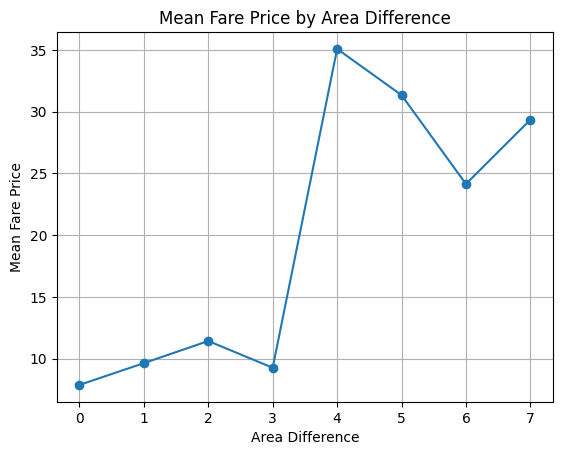

In [80]:
# Calculate the difference in encoded community areas
df_encoded['community_area_difference'] = abs(df_encoded['pickup_community_area_encoded'] - df_encoded['dropoff_community_area_encoded'])

# Calculate the mean fare price for each community area difference
mean_fare_by_area_difference = df_encoded.groupby('community_area_difference')['fare'].mean()

# Plot the mean fare price
plt.plot(mean_fare_by_area_difference.index, mean_fare_by_area_difference.values, marker='o')
plt.xlabel('Area Difference')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Area Difference')
plt.grid(True)
plt.show()

In [81]:
df_encoded['community_area_difference'].value_counts()

community_area_difference
0    6451
3    3043
2    2107
1    1365
7     787
4     407
5     316
6      43
Name: count, dtype: int64

In [82]:
df_encoded.columns

Index(['fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day',
       'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'trip_seconds',
       'tips', 'payment_type_Cash', 'payment_type_Credit Card',
       'dropoff_community_area_encoded', 'pickup_community_area_encoded',
       'community_area_difference'],
      dtype='object')

In [83]:
from geopy.distance import geodesic

# Function to calculate distance between two points
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).kilometers

# Apply the function to create a new column 'distance_km'
df_encoded['distance(km)'] = df_encoded.apply(calculate_distance, axis=1)
df_encoded.drop(columns=['pickup_latitude','pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'],inplace=True)

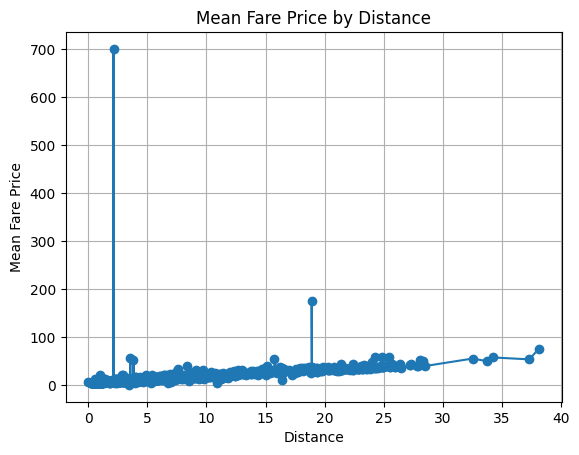

In [84]:
# Calculate the mean fare price for each community area difference
mean_fare_by_area_difference = df_encoded.groupby('distance(km)')['fare'].mean()

# Plot the mean fare price
plt.plot(mean_fare_by_area_difference.index, mean_fare_by_area_difference.values, marker='o')
plt.xlabel('Distance')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Distance')
plt.grid(True)
plt.show()

In [85]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fare                            14519 non-null  float64
 1   trip_start_month                14519 non-null  int64  
 2   trip_start_hour                 14519 non-null  int64  
 3   trip_start_day                  14519 non-null  int64  
 4   trip_start_timestamp            14519 non-null  int64  
 5   trip_miles                      14519 non-null  float64
 6   trip_seconds                    14519 non-null  float64
 7   tips                            14519 non-null  float64
 8   payment_type_Cash               14519 non-null  float64
 9   payment_type_Credit Card        14519 non-null  float64
 10  dropoff_community_area_encoded  14519 non-null  int64  
 11  pickup_community_area_encoded   14519 non-null  int64  
 12  community_area_difference       

In [86]:
df_encoded.sample(5)

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
897,8.85,10,21,7,1444510800,2.8,420.0,2.00,0.0,1.0,3,1,2,4.101287
12486,7.45,4,19,5,1365103800,1.7,600.0,1.75,0.0,1.0,4,3,1,1.847413
13504,40.00,11,15,7,1414854000,0.0,0.0,0.00,0.0,1.0,6,6,0,0.000000
14434,12.65,4,23,2,1398123000,2.2,1440.0,0.00,1.0,0.0,3,3,0,2.645664
1723,15.05,12,2,4,1387333800,5.7,1020.0,0.00,1.0,0.0,3,1,2,7.270129


In [87]:
df_encoded['tips'].value_counts()

tips
0.00    9920
2.00    1555
3.00     560
1.00     438
4.00     145
        ... 
2.39       1
4.11       1
1.46       1
3.47       1
0.03       1
Name: count, Length: 425, dtype: int64

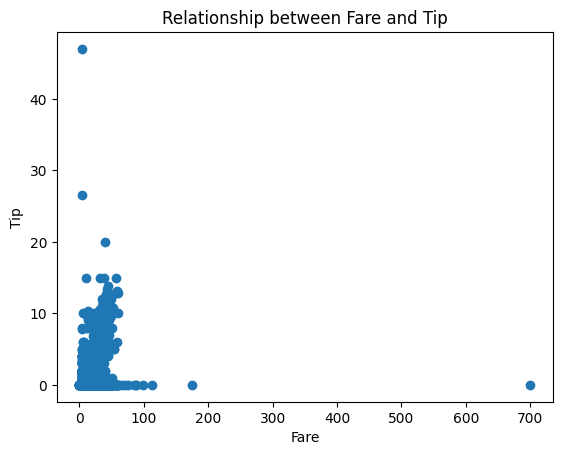

In [88]:
import matplotlib.pyplot as plt

plt.scatter(df_encoded['fare'], df_encoded['tips'])
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.title('Relationship between Fare and Tip')
plt.show()

<Figure size 1500x2000 with 0 Axes>

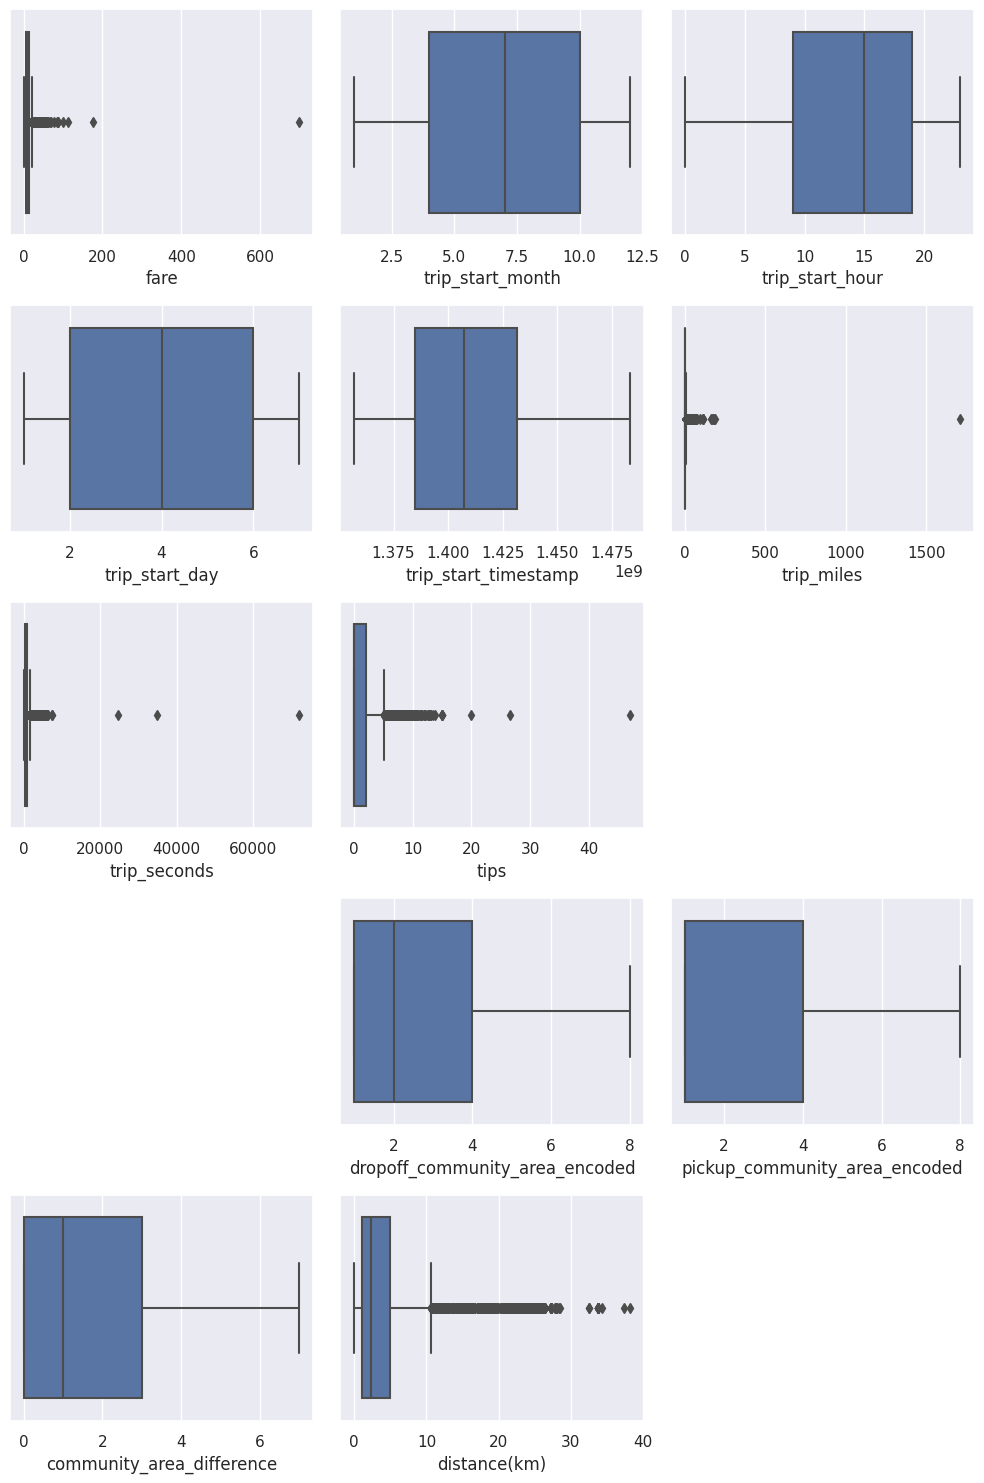

In [89]:
import math
num_cols = len(df_encoded.columns)
num_rows = math.ceil(num_cols / 3)

# Set the size of the plot
plt.figure(figsize=(15, num_rows * 4))
sns.set(rc={'figure.figsize':(10, 10)})

# Set the size of the plot
plt.figure(figsize=(10, 15))

# Loop through each numerical column and create a box plot
for i, column in enumerate(df_encoded.columns):
    if (column == 'payment_type_Cash') or (column == 'payment_type_Credit Card'):  
        continue
    plt.subplot(num_rows, 3, i + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=df_encoded[column])
    #plt.title(column)

plt.tight_layout()  # Adjust layout spacing
plt.show()

In [90]:
df_encoded.describe()

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
count,14519.000000,14519.000000,14519.000000,14519.000000,1.451900e+04,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000
mean,11.322283,6.590468,13.637578,4.193333,1.408651e+09,2.707348,755.484498,1.035615,0.668503,0.331497,2.543219,2.590674,1.631173,4.658531
std,11.007129,3.393357,6.613360,2.018244,2.907089e+07,15.355755,959.254881,2.031571,0.470767,0.470767,1.871669,1.970970,1.911961,6.360035
min,0.000000,1.000000,0.000000,1.000000,1.357006e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.850000,4.000000,9.000000,2.000000,1.384897e+09,0.000000,360.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.102850
50%,7.850000,7.000000,15.000000,4.000000,1.407448e+09,0.900000,540.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.341963
75%,12.050000,10.000000,19.000000,6.000000,1.431279e+09,2.400000,900.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.918175
max,700.070000,12.000000,23.000000,7.000000,1.483116e+09,1710.000000,72120.000000,47.000000,1.000000,1.000000,8.000000,8.000000,7.000000,38.131769


In [91]:
df_encoded[df_encoded['trip_seconds']==72120.000000]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
11887,5.25,5,4,2,1369627200,1.0,72120.0,0.0,1.0,0.0,1,1,0,0.0


In [92]:
df_encoded[df_encoded['trip_seconds']==34980.0]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
8815,9.85,6,14,7,1402755300,1.6,34980.0,0.0,1.0,0.0,1,1,0,2.550806


In [93]:
df_encoded[df_encoded['trip_seconds']==24720.000000]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
8833,175.05,12,7,4,1419407100,71.7,24720.0,0.0,1.0,0.0,8,3,5,18.897747


In [94]:
def handle_outlier(df_encoded,value):
    distance = df_encoded[df_encoded['trip_seconds']==value]['distance(km)'].values[0]
    miles = df_encoded[df_encoded['trip_seconds']==value]['trip_miles'].values[0]
    fare = df_encoded[df_encoded['trip_seconds']== value]['fare'].values[0]

    fill_with = df_encoded[(df_encoded['distance(km)']>=distance) & (df_encoded['trip_miles']>=miles) &(df_encoded['fare']==fare)]['trip_seconds'].median()
    
    print(fill_with)
    df_encoded['trip_seconds'].replace(value,fill_with,inplace=True)


In [95]:
handle_outlier(df_encoded,72120.000000)
handle_outlier(df_encoded,34980.0)

240.0
720.0


In [96]:
def show_boxplot(column):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_encoded[column])
    plt.title('Box Plot')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

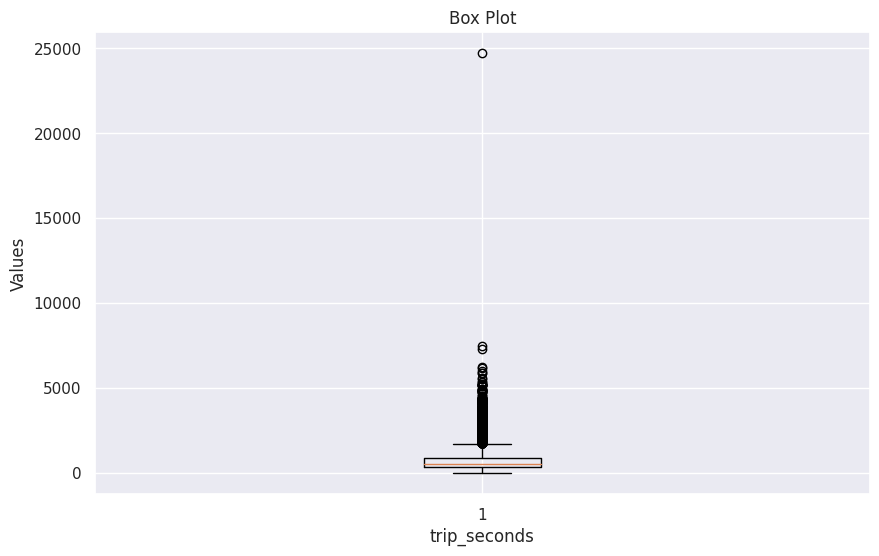

In [97]:
show_boxplot('trip_seconds')

In [98]:
df_encoded.describe()

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
count,14519.000000,14519.000000,14519.000000,14519.000000,1.451900e+04,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000
mean,11.322283,6.590468,13.637578,4.193333,1.408651e+09,2.707348,748.174077,1.035615,0.668503,0.331497,2.543219,2.590674,1.631173,4.658531
std,11.007129,3.393357,6.613360,2.018244,2.907089e+07,15.355755,699.039277,2.031571,0.470767,0.470767,1.871669,1.970970,1.911961,6.360035
min,0.000000,1.000000,0.000000,1.000000,1.357006e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.850000,4.000000,9.000000,2.000000,1.384897e+09,0.000000,360.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.102850
50%,7.850000,7.000000,15.000000,4.000000,1.407448e+09,0.900000,540.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.341963
75%,12.050000,10.000000,19.000000,6.000000,1.431279e+09,2.400000,900.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.918175
max,700.070000,12.000000,23.000000,7.000000,1.483116e+09,1710.000000,24720.000000,47.000000,1.000000,1.000000,8.000000,8.000000,7.000000,38.131769


In [99]:
df_encoded[df_encoded['fare']==700.070000]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
11159,700.07,5,8,6,1463731200,0.0,600.0,0.0,1.0,0.0,1,1,0,2.140487


In [100]:
df_encoded[(df_encoded['distance(km)']<=2.2) & (df_encoded['trip_miles']==0.0)]['fare'].mean()

6.222586412395709

In [101]:
df_encoded['fare'].replace(700.070000,6.22,inplace=True)

In [102]:
df_encoded[df_encoded['fare']==700.070000]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)


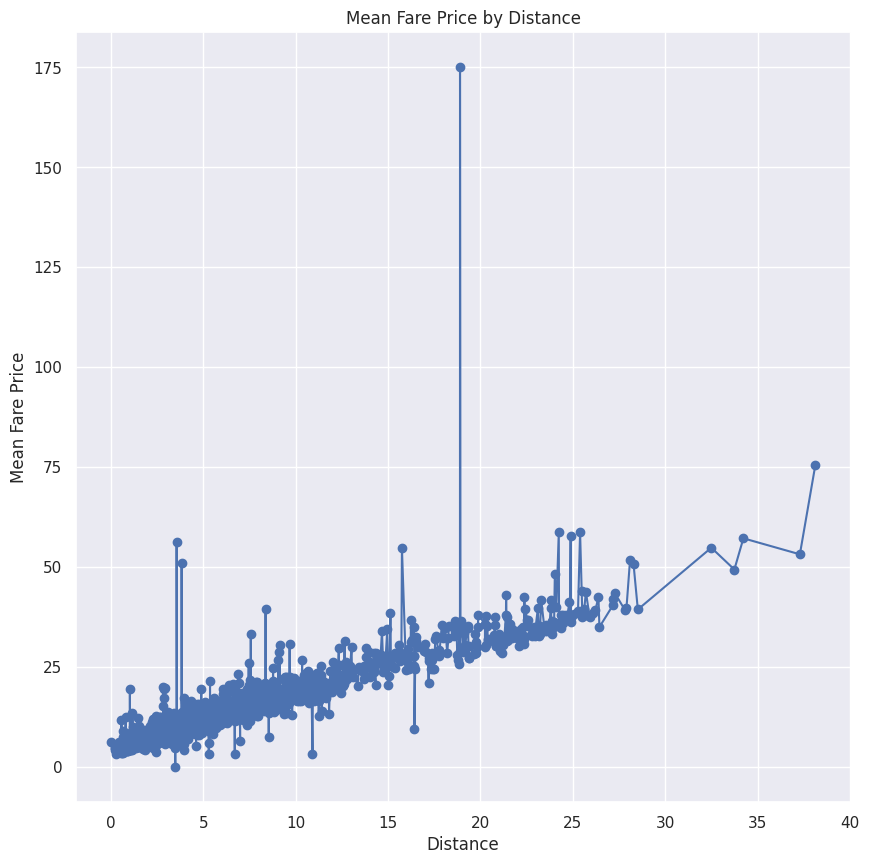

In [103]:
# Calculate the mean fare price for each community area difference
mean_fare_by_area_difference = df_encoded.groupby('distance(km)')['fare'].mean()

# Plot the mean fare price
plt.plot(mean_fare_by_area_difference.index, mean_fare_by_area_difference.values, marker='o')
plt.xlabel('Distance')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Distance')
plt.grid(True)
plt.show()

In [104]:
df_encoded.describe()

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
count,14519.000000,14519.000000,14519.000000,14519.000000,1.451900e+04,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000,14519.000000
mean,11.274494,6.590468,13.637578,4.193333,1.408651e+09,2.707348,748.174077,1.035615,0.668503,0.331497,2.543219,2.590674,1.631173,4.658531
std,9.406463,3.393357,6.613360,2.018244,2.907089e+07,15.355755,699.039277,2.031571,0.470767,0.470767,1.871669,1.970970,1.911961,6.360035
min,0.000000,1.000000,0.000000,1.000000,1.357006e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.850000,4.000000,9.000000,2.000000,1.384897e+09,0.000000,360.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.102850
50%,7.850000,7.000000,15.000000,4.000000,1.407448e+09,0.900000,540.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.341963
75%,12.050000,10.000000,19.000000,6.000000,1.431279e+09,2.400000,900.000000,2.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.918175
max,175.050000,12.000000,23.000000,7.000000,1.483116e+09,1710.000000,24720.000000,47.000000,1.000000,1.000000,8.000000,8.000000,7.000000,38.131769


In [105]:
df_encoded[df_encoded['trip_miles']==1710]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
1458,35.05,10,15,1,1443973500,1710.0,2100.0,5.56,0.0,1.0,4,8,4,24.925042


In [106]:
df_encoded[(df_encoded['trip_seconds']>2100) & (df_encoded['distance(km)'] > 25) & (df_encoded['fare']>35)]['trip_miles'].mean()

13.708423913043477

In [107]:
df_encoded['trip_miles'].replace(1710,13.7, inplace=True)

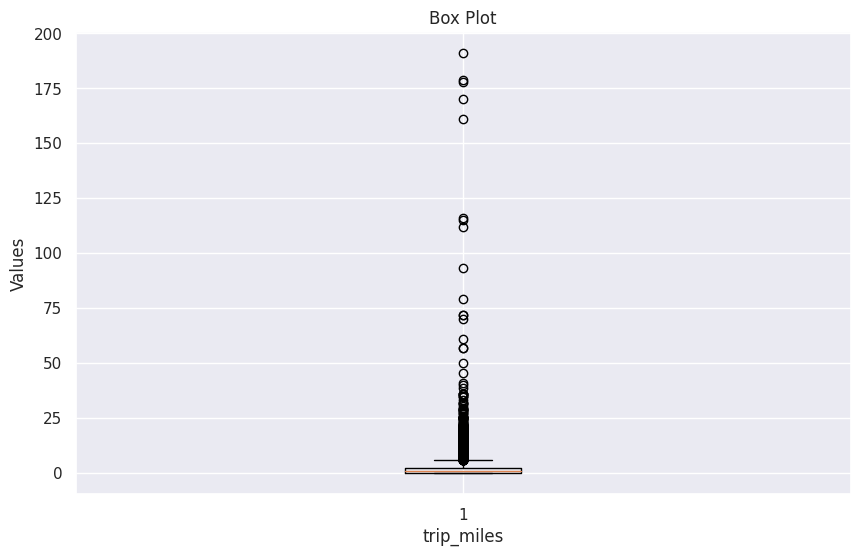

In [108]:
show_boxplot('trip_miles')

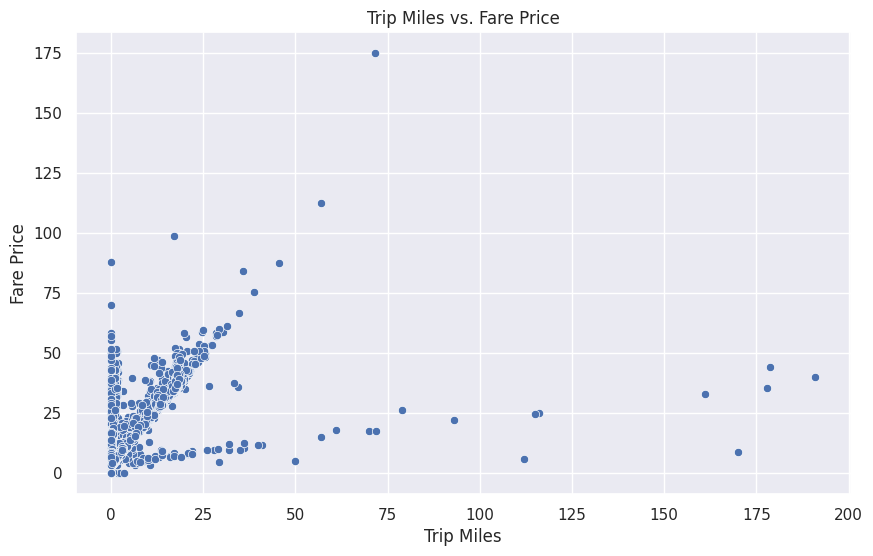

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='trip_miles', y='fare')
plt.title('Trip Miles vs. Fare Price')
plt.xlabel('Trip Miles')
plt.ylabel('Fare Price')
plt.show()

In [110]:
df_encoded[df_encoded['fare']==175.050000]

,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,trip_miles,trip_seconds,tips,payment_type_Cash,payment_type_Credit Card,dropoff_community_area_encoded,pickup_community_area_encoded,community_area_difference,distance(km)
8833,175.05,12,7,4,1419407100,71.7,24720.0,0.0,1.0,0.0,8,3,5,18.897747


In [124]:
df_encoded[(df_encoded['distance(km)']>18.8) & (df_encoded['trip_seconds'] > 24000)]['fare']

8833    65.61
Name: fare, dtype: float64

In [125]:
df_encoded['fare'].replace(175.050000,65.61,inplace=True)

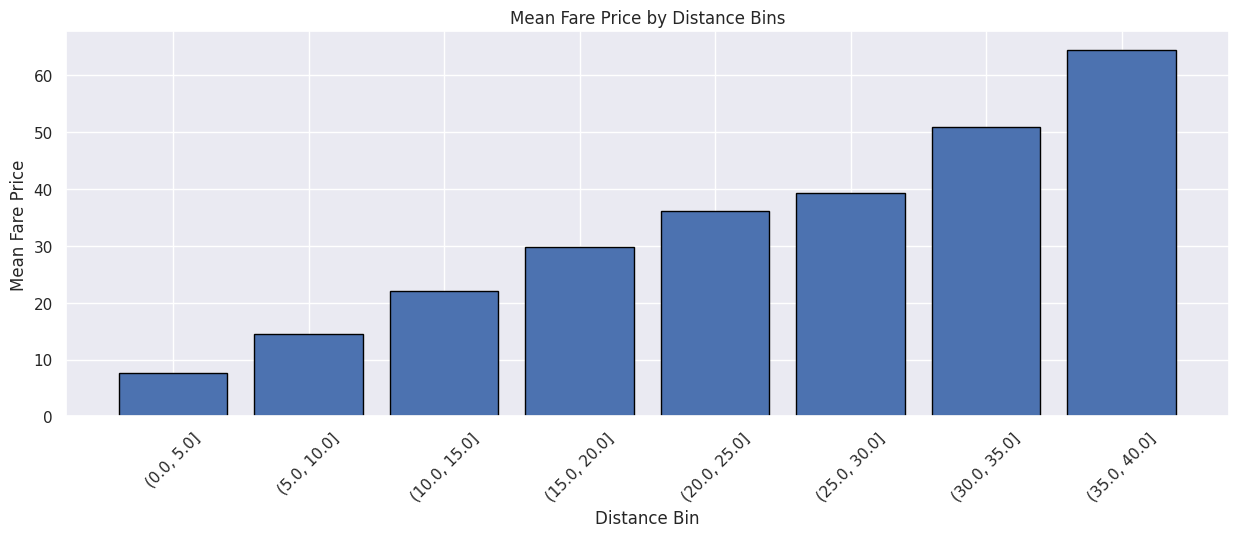

In [126]:

# Bin the distances into intervals of equal width
bin_width = 5  # Specify the width of each distance bin
df_encoded['distance_bin'] = pd.cut(df_encoded['distance(km)'], bins=np.arange(0, df_encoded['distance(km)'].max() + bin_width, bin_width))

# Calculate the mean fare price for each distance bin
mean_fare_by_distance_bin = df_encoded.groupby('distance_bin')['fare'].mean()

# Plot the mean fare price by distance bins
plt.figure(figsize = (15,5))
plt.bar(range(len(mean_fare_by_distance_bin)), mean_fare_by_distance_bin.values, edgecolor='black')
plt.xlabel('Distance Bin')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Distance Bins')
plt.xticks(range(len(mean_fare_by_distance_bin)), mean_fare_by_distance_bin.index, rotation=45)
plt.grid(True)
plt.show()

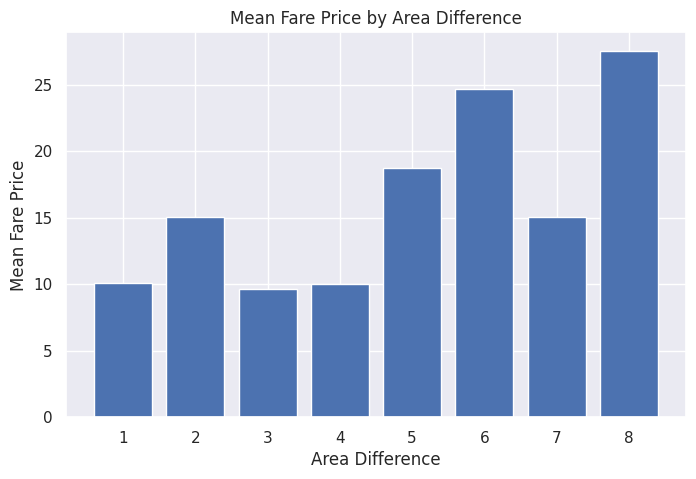

In [127]:
# Calculate the mean fare price for each community area difference
mean_fare_by_area_difference = df_encoded.groupby('dropoff_community_area_encoded')['fare'].mean()

# Plot the mean fare price
plt.figure(figsize=(8,5))
plt.bar(mean_fare_by_area_difference.index, mean_fare_by_area_difference.values)
plt.xlabel('Area Difference')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Area Difference')
plt.grid(True)
plt.show()

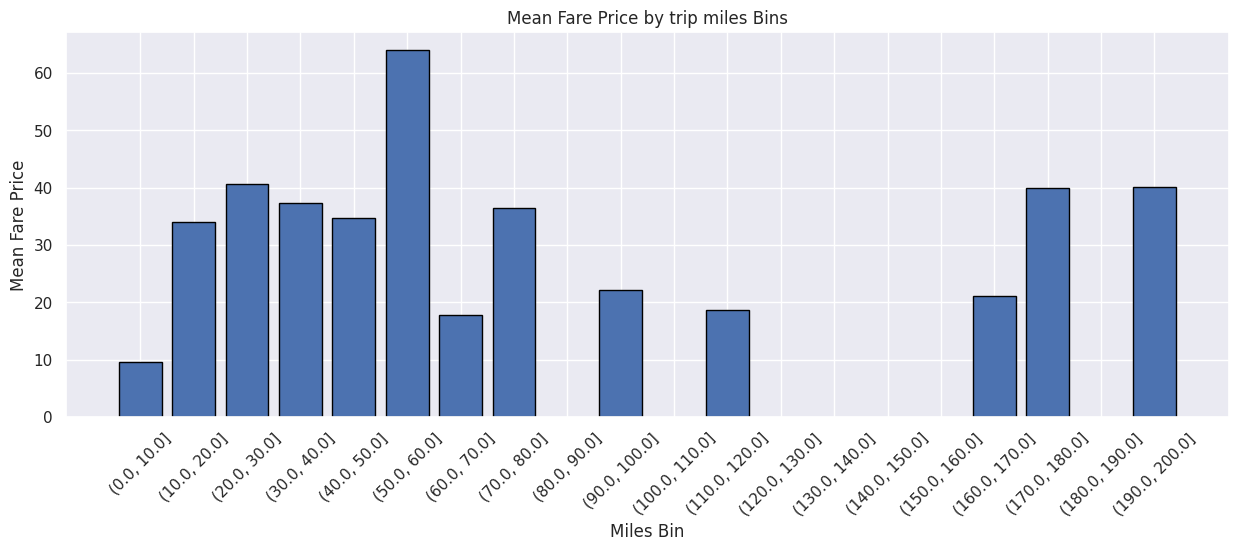

In [128]:

# Bin the distances into intervals of equal width
bin_width = 10  # Specify the width of each distance bin
df_encoded['miles_bin'] = pd.cut(df_encoded['trip_miles'], bins=np.arange(0, df_encoded['trip_miles'].max() + bin_width, bin_width))

# Calculate the mean fare price for each distance bin
mean_fare_by_trip_miles_bin = df_encoded.groupby('miles_bin')['fare'].mean()

# Plot the mean fare price by distance bins
plt.figure(figsize = (15,5))
plt.bar(range(len(mean_fare_by_trip_miles_bin)), mean_fare_by_trip_miles_bin.values, edgecolor='black')
plt.xlabel('Miles Bin')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by trip miles Bins')
plt.xticks(range(len(mean_fare_by_trip_miles_bin)), mean_fare_by_trip_miles_bin.index, rotation=45)
plt.grid(True)
plt.show()

In [129]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   fare                            14519 non-null  float64 
 1   trip_start_month                14519 non-null  int64   
 2   trip_start_hour                 14519 non-null  int64   
 3   trip_start_day                  14519 non-null  int64   
 4   trip_start_timestamp            14519 non-null  int64   
 5   trip_miles                      14519 non-null  float64 
 6   trip_seconds                    14519 non-null  float64 
 7   tips                            14519 non-null  float64 
 8   payment_type_Cash               14519 non-null  float64 
 9   payment_type_Credit Card        14519 non-null  float64 
 10  dropoff_community_area_encoded  14519 non-null  int64   
 11  pickup_community_area_encoded   14519 non-null  int64   
 12  community_area_dif

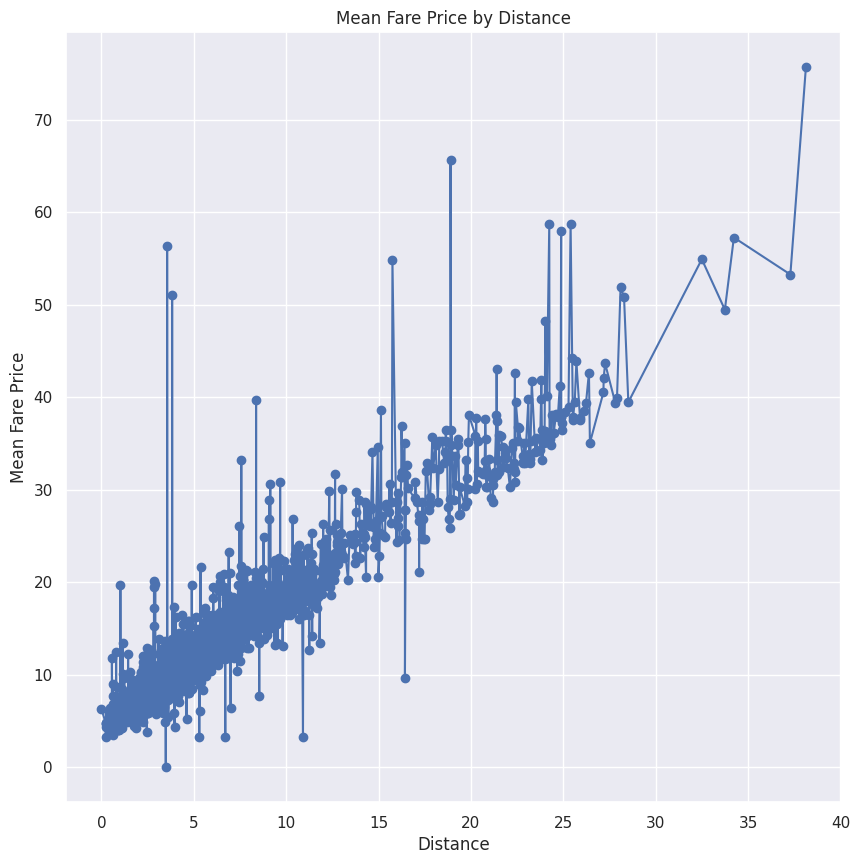

In [130]:
# Calculate the mean fare price for each community area difference
mean_fare_by_area_difference = df_encoded.groupby('distance(km)')['fare'].mean()

# Plot the mean fare price
plt.plot(mean_fare_by_area_difference.index, mean_fare_by_area_difference.values, marker='o')
plt.xlabel('Distance')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Distance')
plt.grid(True)
plt.show()

In [131]:
import datetime
def convert_unix_timestamp(timestamp):
    # Convert Unix timestamp to datetime object
    dt_object = datetime.datetime.fromtimestamp(timestamp)
    
    # Convert datetime object to a specific format
    formatted_time = dt_object.strftime('%Y-%m-%d %H:%M:%S')
    
    return formatted_time

In [132]:
df_encoded['trip_start_time']= df_encoded['trip_start_timestamp'].apply(convert_unix_timestamp)

In [133]:
 df_encoded['trip_start_time'] =  pd.to_datetime(df_encoded['trip_start_time'])

In [134]:
df_encoded['year'] = df_encoded['trip_start_time'].dt.year

In [135]:
df_encoded['year']

0        2016
1        2015
2        2015
3        2014
4        2013
         ... 
14514    2014
14515    2015
14516    2013
14517    2015
14518    2014
Name: year, Length: 14519, dtype: int32

In [136]:
df_encoded.drop(columns='trip_start_timestamp',inplace=True)

In [89]:
df_encoded['year'].value_counts()

year
2014    5027
2015    4487
2013    4193
2016     812
Name: count, dtype: int64

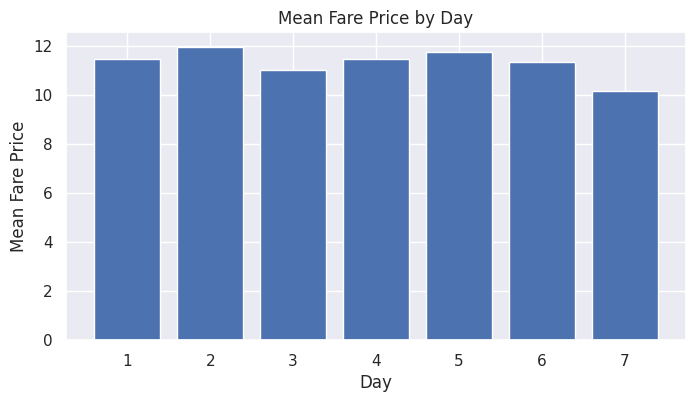

In [137]:
mean_fare_by_day = df_encoded.groupby('trip_start_day')['fare'].mean()

# Plot the mean fare price
plt.figure(figsize=(8,4))
plt.bar(mean_fare_by_day.index, mean_fare_by_day.values)
plt.xlabel('Day')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Day')
plt.grid(True)
plt.show()

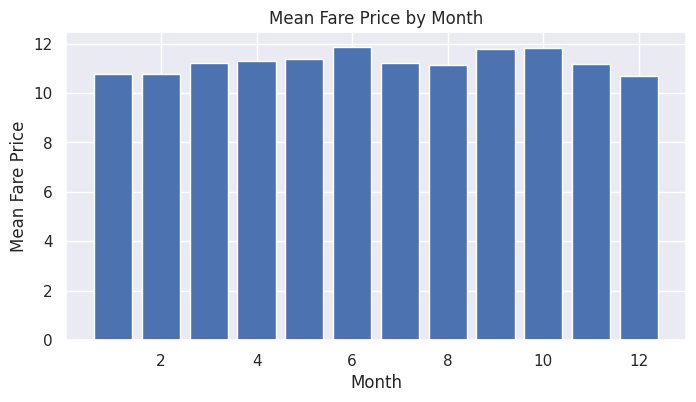

In [138]:
mean_fare_by_month = df_encoded.groupby('trip_start_month')['fare'].mean()

# Plot the mean fare price
plt.figure(figsize=(8,4))
plt.bar(mean_fare_by_month.index, mean_fare_by_month.values)
plt.xlabel('Month')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Month')
plt.grid(True)
plt.show()

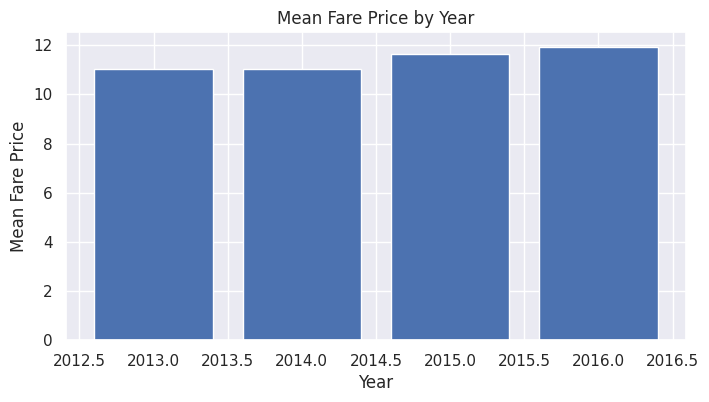

In [139]:
mean_fare_by_year = df_encoded.groupby('year')['fare'].mean()

# Plot the mean fare price
plt.figure(figsize=(8,4))
plt.bar(mean_fare_by_year.index, mean_fare_by_year.values)
plt.xlabel('Year')
plt.ylabel('Mean Fare Price')
plt.title('Mean Fare Price by Year')
plt.grid(True)
plt.show()

In [140]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14519 entries, 0 to 14518
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fare                            14519 non-null  float64       
 1   trip_start_month                14519 non-null  int64         
 2   trip_start_hour                 14519 non-null  int64         
 3   trip_start_day                  14519 non-null  int64         
 4   trip_miles                      14519 non-null  float64       
 5   trip_seconds                    14519 non-null  float64       
 6   tips                            14519 non-null  float64       
 7   payment_type_Cash               14519 non-null  float64       
 8   payment_type_Credit Card        14519 non-null  float64       
 9   dropoff_community_area_encoded  14519 non-null  int64         
 10  pickup_community_area_encoded   14519 non-null  int64         
 11  co

In [141]:
df_encoded.drop(columns = ['distance_bin','miles_bin','trip_start_time'],inplace=True)

In [95]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.8.2 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 require

In [142]:
from ydata_profiling import ProfileReport
profile =  ProfileReport(df_encoded,title='Pandas Profiling Report', explorative=True)
# To display the report in the Jupyter Notebook
profile.to_widgets()

AttributeError: module 'numba' has no attribute 'generated_jit'

In [ ]:
sns.pairplot(df_encoded)

<Axes: >

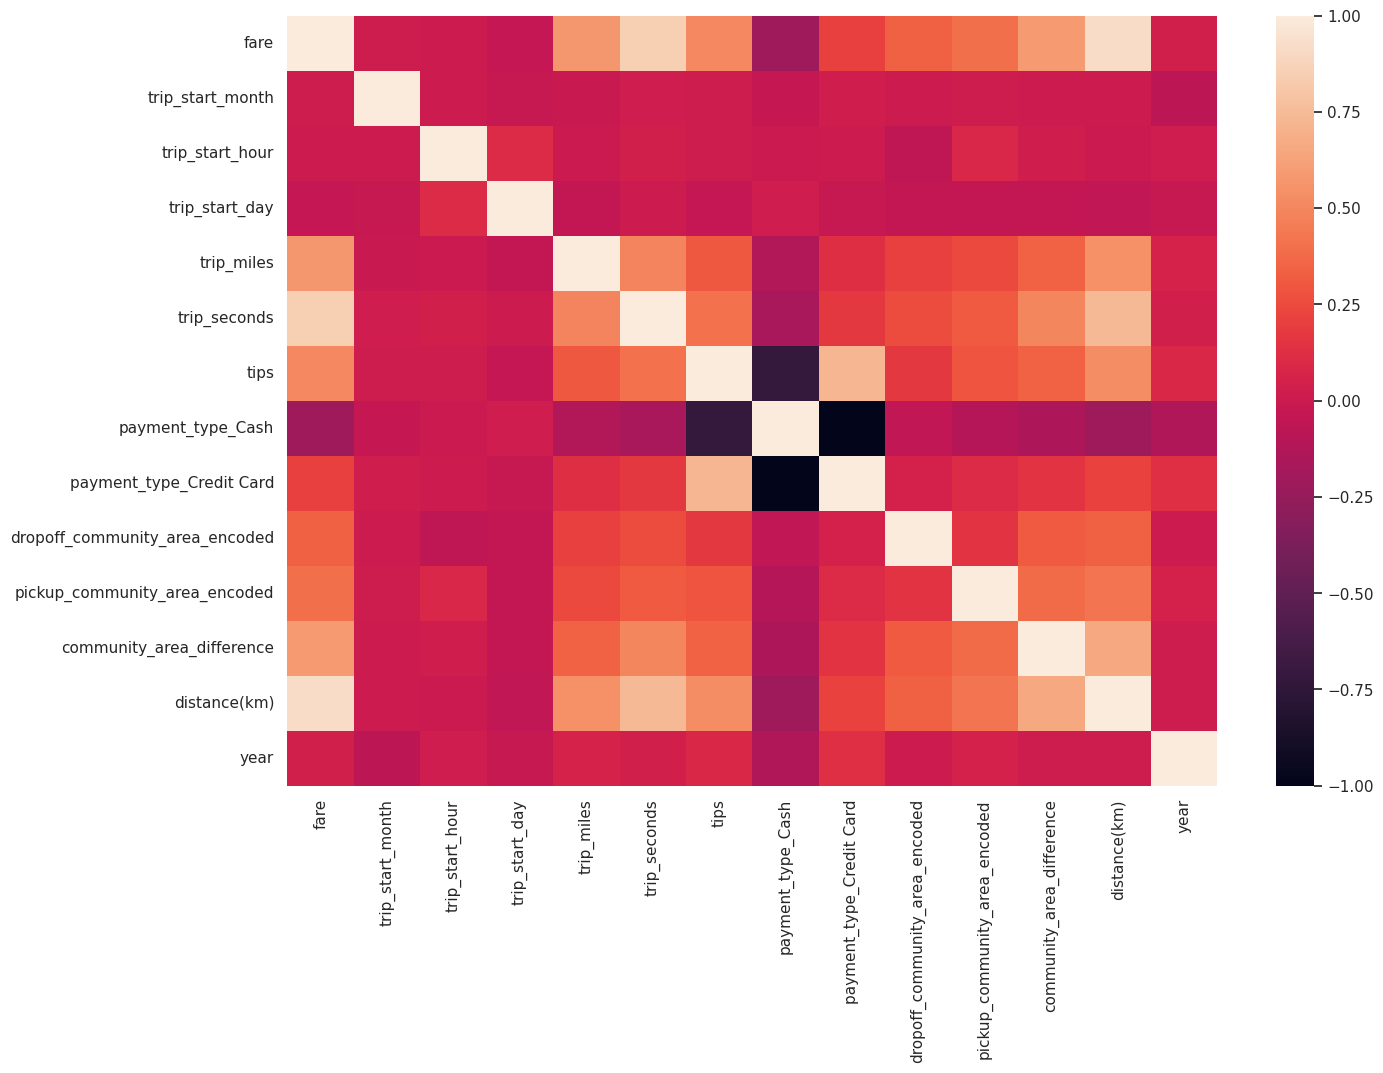

In [143]:
plt.figure(figsize = (15,10))
sns.heatmap(df_encoded.corr())

In [144]:
X = df_encoded.drop(columns=['fare'])
y = df_encoded['fare']

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size=0.2)

In [150]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

r2_score_without_scaling = []
mse_without_scaling = []
# Initialize models in a list
models = [
    LinearRegression(),
    Ridge(alpha=0.1),
    Lasso(alpha=0.1),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor( learning_rate=0.1),
    AdaBoostRegressor(),
    XGBRegressor()
]

# Loop through models and fit them to the training data
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(model.__class__.__name__)
    print("Mean Squared Error:", mse)
    mse_without_scaling.append(mse)
    r = r2_score(y_test, y_pred)
    print("R2_Score",r)
    r2_score_without_scaling.append(r)
    print("-"*50)

LinearRegression
Mean Squared Error: 12.28219681070741
R2_Score 0.8681670463812792
--------------------------------------------------
Ridge
Mean Squared Error: 12.282193719372025
R2_Score 0.8681670795626295
--------------------------------------------------
Lasso
Mean Squared Error: 12.31558547899589
R2_Score 0.8678086636891839
--------------------------------------------------
DecisionTreeRegressor
Mean Squared Error: 8.921246935261708
R2_Score 0.9042423475568967
--------------------------------------------------
RandomForestRegressor
Mean Squared Error: 6.354855679896693
R2_Score 0.9317891247784661
--------------------------------------------------
GradientBoostingRegressor
Mean Squared Error: 7.5549465689742155
R2_Score 0.9189077543724748
--------------------------------------------------
AdaBoostRegressor
Mean Squared Error: 15.29570704442723
R2_Score 0.8358210450108091
--------------------------------------------------
XGBRegressor
Mean Squared Error: 7.044293612958652
R2_Score 0.

In [151]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

r2_score_with_scaling = []
mse_with_scaling = []
# Initialize models in a list
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(learning_rate=0.1),
    AdaBoostRegressor(),
    XGBRegressor()
]

# Loop through models and fit them to the training data
for model in models:
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_scaled, y_pred)
    print(model.__class__.__name__)
    print("Mean Squared Error:", mse)
    mse_with_scaling.append(mse)
    r = r2_score(y_test_scaled, y_pred)
    r2_score_with_scaling.append(r)
    print("R2_Score",r)
    print("-"*50)

LinearRegression
Mean Squared Error: 5.794824440047097
R2_Score 0.9304953541160284
--------------------------------------------------
Ridge
Mean Squared Error: 5.795191803212098
R2_Score 0.9304909478657686
--------------------------------------------------
Lasso
Mean Squared Error: 7.294461231077938
R2_Score 0.9125083166839976
--------------------------------------------------
DecisionTreeRegressor
Mean Squared Error: 6.838159504132232
R2_Score 0.9179813194083645
--------------------------------------------------
RandomForestRegressor
Mean Squared Error: 3.1461440657885684
R2_Score 0.9622643219902592
--------------------------------------------------
GradientBoostingRegressor
Mean Squared Error: 3.181652808204322
R2_Score 0.9618384208101759
--------------------------------------------------
AdaBoostRegressor
Mean Squared Error: 40.775367634873675
R2_Score 0.510929534177981
--------------------------------------------------
XGBRegressor
Mean Squared Error: 3.960380623686056
R2_Score 0.9

In [166]:
models = [DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(learning_rate=0.1), 
          XGBRegressor()]
cv_scores = [] 
cv_mean_scores = []
cv_std_scores = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=7)
    print(model.__class__.__name__)
    # Print the cross-validation scores
    print("Cross-Validation Scores:", scores)
    cv_scores.append(scores)
    # Calculate and print the mean and standard deviation of the scores
    print("Mean Score:", scores.mean())
    cv_mean_scores.append(scores.mean())
    print("Standard Deviation:", scores.std())
    cv_std_scores.append(scores.std())
    print("-"*50)

DecisionTreeRegressor
Cross-Validation Scores: [0.89306939 0.91693536 0.89163887 0.8952719  0.83157007 0.84036996
 0.89619262]
Mean Score: 0.8807211658255681
Standard Deviation: 0.02946737441270729
--------------------------------------------------
RandomForestRegressor
Cross-Validation Scores: [0.95878265 0.94534485 0.95024749 0.93782169 0.9571332  0.93982049
 0.93668656]
Mean Score: 0.9465481349777559
Standard Deviation: 0.008413618350314879
--------------------------------------------------
GradientBoostingRegressor
Cross-Validation Scores: [0.96805463 0.94663885 0.94014342 0.92523953 0.97230137 0.94043969
 0.92094373]
Mean Score: 0.9448230291918588
Standard Deviation: 0.01809858044993454
--------------------------------------------------
XGBRegressor
Cross-Validation Scores: [0.96458028 0.94775516 0.93698164 0.93744497 0.96829485 0.92422287
 0.93610524]
Mean Score: 0.9450550019917973
Standard Deviation: 0.014956057561386363
--------------------------------------------------


In [154]:
import pandas as pd

# Data for simple one
Before = {
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 
              'RandomForestRegressor', 'GradientBoostingRegressor', 
              'AdaBoostRegressor', 'XGBRegressor'],
    'encoded_r2_score': [0.898117859538956, 0.8981178191725067, 0.8977849026517084, 
                         0.9148399244278667, 0.9431387950906981, 0.9585913762801607, 
                         0.7159715182298336, 0.9040077898015759],
    'encoded_mse': [9.523959973284988, 9.523963746747599, 9.555084840240331, 
                     7.9607784779614335, 5.315395192310606, 3.8708852510549963, 
                     26.5510312151941, 8.973368281622584],
    'scaled_r2_score': [0.8930677590107154, 0.893073995620781, 0.86616117682913, 
                        -0.9583379288964531, 0.7147626601522558, 0.962474087670464, 
                        0.7960304377216005, 0.9335837379534195],
    'scaled_mse': [9.426894203161178, 9.426344398324666, 11.798915038485154, 
                    172.64245375344348, 25.145851248037182, 3.3081959391750266, 
                    17.981475619277862, 5.855101042400136]
}

# Create DataFrame for simple data
df_simple = pd.DataFrame(Before)
print("Before:")
df_simple


Before:


,Model,encoded_r2_score,encoded_mse,scaled_r2_score,scaled_mse
0,LinearRegression,0.898118,9.523960,0.893068,9.426894
1,Ridge,0.898118,9.523964,0.893074,9.426344
2,Lasso,0.897785,9.555085,0.866161,11.798915
3,DecisionTreeRegressor,0.914840,7.960778,-0.958338,172.642454
4,RandomForestRegressor,0.943139,5.315395,0.714763,25.145851
5,GradientBoostingRegressor,0.958591,3.870885,0.962474,3.308196
6,AdaBoostRegressor,0.715972,26.551031,0.796030,17.981476
7,XGBRegressor,0.904008,8.973368,0.933584,5.855101


In [155]:
# Data for preprocessed
After = {
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 
              'RandomForestRegressor', 'GradientBoostingRegressor', 
              'AdaBoostRegressor', 'XGBRegressor'],
    'preprocessed_encoded_r2_score': r2_score_without_scaling,
    'preprocessed_encoded_mse': mse_without_scaling,
    'preprocessed_scaled_r2_score': r2_score_with_scaling,
    'preprocessed_scaled_mse': mse_with_scaling
}

# Create DataFrame for preprocessed data
df_preprocessed = pd.DataFrame(After)

# Display DataFrames

print("\nPreprocessed DataFrame:")
df_preprocessed



Preprocessed DataFrame:


,Model,preprocessed_encoded_r2_score,preprocessed_encoded_mse,preprocessed_scaled_r2_score,preprocessed_scaled_mse
0,LinearRegression,0.868167,12.282197,0.930495,5.794824
1,Ridge,0.868167,12.282194,0.930491,5.795192
2,Lasso,0.867809,12.315585,0.912508,7.294461
3,DecisionTreeRegressor,0.904242,8.921247,0.917981,6.838160
4,RandomForestRegressor,0.931789,6.354856,0.962264,3.146144
5,GradientBoostingRegressor,0.918908,7.554947,0.961838,3.181653
6,AdaBoostRegressor,0.835821,15.295707,0.510930,40.775368
7,XGBRegressor,0.924389,7.044294,0.952498,3.960381


In [156]:
# Data for cv scores
cv_scores_simple = {
    'Model': ['DecisionTreeRegressor', 'RandomForestRegressor', 
              'GradientBoostingRegressor', 'XGBRegressor'],
    'cv1': [0.9074713, 0.9611773, 0.96829263, 0.8987814],
    'cv2': [-2.91718124, 0.35491412, 0.94049666, 0.81110256],
    'cv3': [-2.72610419, 0.34530052, 0.94467773, 0.95047746],
    'cv4': [0.91871657, 0.86452244, 0.5332622, 0.6557328],
    'cv5': [0.88908718, 0.78352175, 0.8932587, 0.88221375],
    'cv6': [0.13752211, 0.15129043, 0.15154326, 0.15120948],
    'cv7': [0.87916608, 0.91149913, 0.91771971, 0.79402588],
    'mean': [-0.273046026897496, 0.6246036692553524, 0.7641786993089106, 0.7347919055326457],
    'std': [1.6331204621255855, 0.3054680065836592, 0.2864091765961554, 0.25391134003776916]
}

# Create DataFrame for cv scores
df_cv_simple = pd.DataFrame(cv_scores_simple)

# Display DataFrame
print("CV Scores DataFrame for Simple Data:")
df_cv_simple

CV Scores DataFrame for Simple Data:


,Model,cv1,cv2,cv3,cv4,cv5,cv6,cv7,mean,std
0,DecisionTreeRegressor,0.907471,-2.917181,-2.726104,0.918717,0.889087,0.137522,0.879166,-0.273046,1.633120
1,RandomForestRegressor,0.961177,0.354914,0.345301,0.864522,0.783522,0.151290,0.911499,0.624604,0.305468
2,GradientBoostingRegressor,0.968293,0.940497,0.944678,0.533262,0.893259,0.151543,0.917720,0.764179,0.286409
3,XGBRegressor,0.898781,0.811103,0.950477,0.655733,0.882214,0.151209,0.794026,0.734792,0.253911


In [169]:
# Data for cv scores
df_cv_preprocessed = pd.DataFrame(cv_scores,index=['DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor', 'XGBRegressor'])

# Create DataFrame for cv scores
df_cv_preprocessed['mean'] = cv_mean_scores
df_cv_preprocessed['std'] = cv_std_scores

# Display DataFrame
print("\nCV Scores DataFrame for Preprocessed Data:")
df_cv_preprocessed



CV Scores DataFrame for Preprocessed Data:


,0,1,2,3,4,5,6,mean,std
DecisionTreeRegressor,0.893069,0.916935,0.891639,0.895272,0.831570,0.840370,0.896193,0.880721,0.029467
RandomForestRegressor,0.958783,0.945345,0.950247,0.937822,0.957133,0.939820,0.936687,0.946548,0.008414
GradientBoostingRegressor,0.968055,0.946639,0.940143,0.925240,0.972301,0.940440,0.920944,0.944823,0.018099
XGBRegressor,0.964580,0.947755,0.936982,0.937445,0.968295,0.924223,0.936105,0.945055,0.014956


In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
def hyperparameter_tuning(param_grid, model,model_name,X_train,y_train):
    # Perform grid search with cross-validation 
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Get the best hyperparameters 
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}:", best_params)

    # Get the best model
    print(f"Best model estimator in the {model_name}")
    
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    test_predictions = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test_scaled, test_predictions)
    print("Mean Squared Error:", mse)
    r = r2_score(y_test_scaled,test_predictions)
    print("R2_Score",r)

In [173]:
# RandomForestRegressor
# Define the hyperparameter grid for RandomForestRegressor
param_grid_rfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3,7,11,15,None],
    'min_samples_split': [2,3,5,7]
}

# Initialize the RandomForestRegressor model
model_rfr = RandomForestRegressor()
hyperparameter_tuning(param_grid_rfr,model_rfr,"Random Forest",X_train_scaled,y_train_scaled)

Best Hyperparameters for Random Forest: {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 100}
Best model estimator in the Random Forest
Mean Squared Error: 3.0810763654249183
R2_Score 0.9630447610732806


In [174]:
#GradientBoostingRegressor
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3,7,11,15,None],
    'learning_rate': [0.05,0.01, 0.1],
    'min_samples_split': [2,3,5,7]
}

model_gbr = GradientBoostingRegressor()
hyperparameter_tuning(param_grid_gbr,model_gbr,"Gradient Boosting",X_train_scaled,y_train_scaled)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 200}
Best model estimator in the Gradient Boosting
Mean Squared Error: 3.1334866478221097
R2_Score 0.9624161383848138


In [176]:
#XGBRegressor
# Define the hyperparameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.05,0.01, 0.1, 0.5],
    'max_depth': [3,7,11,15,None]
}
# Initialize the XGBRegressor model
model_xgb = XGBRegressor()

hyperparameter_tuning(param_grid_xgb,model_xgb,"Xgboost",X_train_scaled,y_train_scaled)

Best Hyperparameters for Xgboost: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}
Best model estimator in the Xgboost
Mean Squared Error: 3.3110644649632777
R2_Score 0.9602862234193235


In [177]:
import joblib

In [179]:
model = RandomForestRegressor(max_depth= 11,min_samples_split= 5, n_estimators= 100)
model.fit(X_train_scaled,y_train_scaled)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
print(model.__class__.__name__)
print("Mean Squared Error:", mse)
r = r2_score(y_test_scaled, y_pred)
print("R2_Score",r)

RandomForestRegressor
Mean Squared Error: 3.012317053144074
R2_Score 0.9638694783189452


In [181]:
X_train_scaled.columns

Index(['trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_miles',
       'trip_seconds', 'tips', 'payment_type_Cash', 'payment_type_Credit Card',
       'dropoff_community_area_encoded', 'pickup_community_area_encoded',
       'community_area_difference', 'distance(km)', 'year'],
      dtype='object')

In [279]:
train = X_train_scaled.drop(columns=['trip_start_month', 'trip_start_hour', 'trip_start_day',
                                     'dropoff_community_area_encoded', 'pickup_community_area_encoded',
                                     'year', 'payment_type_Cash','payment_type_Credit Card'])

In [278]:
test = X_test_scaled.drop(columns=['trip_start_month', 'trip_start_hour', 'trip_start_day',
                                   'dropoff_community_area_encoded', 'pickup_community_area_encoded',
                                   'year', 'payment_type_Cash','payment_type_Credit Card'])

In [275]:
train.columns, test.columns

(Index(['trip_miles', 'trip_seconds', 'tips', 'community_area_difference',
        'distance(km)'],
       dtype='object'),
 Index(['trip_miles', 'trip_seconds', 'tips', 'community_area_difference',
        'distance(km)'],
       dtype='object'))

In [256]:
from sklearn.preprocessing import MinMaxScaler

In [283]:
X.columns

Index(['trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_miles',
       'trip_seconds', 'tips', 'payment_type_Cash', 'payment_type_Credit Card',
       'dropoff_community_area_encoded', 'pickup_community_area_encoded',
       'community_area_difference', 'distance(km)', 'year'],
      dtype='object')

In [321]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
data = X.drop(columns=['trip_start_month', 'trip_start_hour', 'trip_start_day',
                     #'dropoff_community_area_encoded', 'pickup_community_area_encoded',
                    'year', 'payment_type_Cash','payment_type_Credit Card'])
scaled = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

In [322]:
train,test,ytrain,ytest = train_test_split(scaled,y,test_size=0.2)

In [323]:
model = RandomForestRegressor(max_depth= 11,min_samples_split= 5, n_estimators= 100)
model.fit(train,ytrain)
y_pred = model.predict(test)
mse = mean_squared_error(ytest, y_pred)
print(model.__class__.__name__)
print("Mean Squared Error:", mse)
r = r2_score(ytest, y_pred)
print("R2_Score",r)

RandomForestRegressor
Mean Squared Error: 3.7869646209759416
R2_Score 0.9592020481470734


In [324]:
model1 = XGBRegressor(learning_rate = 0.1, max_depth= None, n_estimators= 200)
model1.fit(train,ytrain)
y_pred = model1.predict(test)
mse = mean_squared_error(ytest, y_pred)
print(model1.__class__.__name__)
print("Mean Squared Error:", mse)
r = r2_score(ytest, y_pred)
print("R2_Score",r)

XGBRegressor
Mean Squared Error: 3.4027509848152158
R2_Score 0.9633412812791969


In [325]:
model2 = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, min_samples_split= 3, n_estimators= 200)
model2.fit(train,ytrain)
y_pred = model2.predict(test)
mse = mean_squared_error(ytest, y_pred)
print(model2.__class__.__name__)
print("Mean Squared Error:", mse)
r = r2_score(ytest, y_pred)
print("R2_Score",r)

GradientBoostingRegressor
Mean Squared Error: 3.7469350010951543
R2_Score 0.9596332976220597


In [326]:
model3 = LinearRegression()
model3.fit(train,ytrain)
y_pred = model3.predict(test)
mse = mean_squared_error(ytest, y_pred)
print(model3.__class__.__name__)
print("Mean Squared Error:", mse)
r = r2_score(ytest, y_pred)
print("R2_Score",r)

LinearRegression
Mean Squared Error: 7.666976949435538
R2_Score 0.9174016692133877


In [327]:
# Save the scaler to a file
joblib.dump(scaler, 'preprocessor.pkl')

['preprocessor.pkl']

In [328]:
joblib.dump(model1, 'Final_model.pkl')

['Final_model.pkl']

In [329]:
loaded_model = joblib.load('Final_model.pkl')
loaded_scaler = joblib.load('preprocessor.pkl')

In [341]:
def predict(x):
    # scaling 
    x = loaded_scaler.transform(x)
    y_pred = loaded_model.predict(x)
    print("Here is the predction of the machine learning model: ",y_pred)

In [336]:
train.columns

Index(['trip_miles', 'trip_seconds', 'tips', 'dropoff_community_area_encoded',
       'pickup_community_area_encoded', 'community_area_difference',
       'distance(km)'],
      dtype='object')

In [339]:
trip_mile = int(input("Enter trip mile: "))
trip_second = int(input("Enter trip_seconds: "))
tip = int(input("Enter tip: "))
dropoff_area = int(input("Enter drop off area: "))
pickup_area = int(input("Enter pickup area: "))
difference = abs(dropoff_area-pickup_area)
distance = float(input("Enter the distance: "))

Enter trip mile:  2
Enter trip_seconds:  300
Enter tip:  0
Enter drop off area:  2
Enter pickup area:  0
Enter the distance:  5.76


In [342]:
x = [[trip_mile,trip_second,tip,dropoff_area,pickup_area,difference,distance]]
predict(x)

Here is the predction of the machine learning model:  [6.1020255]


In [335]:
x = [[2,300,0,2,0,2,5.76]]
predict(x)

[6.1020255]
